# Yelp Dataset Exploratory Data Analysis (EDA)

This notebook performs EDA on the Yelp dataset, focusing on businesses, reviews, users, check-ins, and tips.

**Objectives:**
- Load and inspect the different JSON files.
- Perform initial exploration and basic cleaning.
- Analyze relationships between different data entities.
- Conduct basic text analysis on reviews and tips.
- Visualize key findings.
- Summarize observations and suggest next steps for cleaning and analysis.

## 1. Setup

Import necessary libraries and define file paths.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style('whitegrid')

# Define the base path to the dataset
base_path = '../yelp_dataset/' # Adjust if your notebook is in a different location relative to the data

# Define file paths
business_path = os.path.join(base_path, 'yelp_academic_dataset_business.json')
review_path = os.path.join(base_path, 'yelp_academic_dataset_review.json')
user_path = os.path.join(base_path, 'yelp_academic_dataset_user.json')
checkin_path = os.path.join(base_path, 'yelp_academic_dataset_checkin.json')
tip_path = os.path.join(base_path, 'yelp_academic_dataset_tip.json')

# Verify paths exist (optional check)
print(f"Business file exists: {os.path.exists(business_path)}")
print(f"Review file exists: {os.path.exists(review_path)}")
print(f"User file exists: {os.path.exists(user_path)}")
print(f"Checkin file exists: {os.path.exists(checkin_path)}")
print(f"Tip file exists: {os.path.exists(tip_path)}")

Business file exists: True
Review file exists: True
User file exists: True
Checkin file exists: True
Tip file exists: True


## 2. Load Data

Load each JSON file into a pandas DataFrame. Since the files can be very large, we might load them line by line or use chunking if memory becomes an issue. For initial inspection, loading a subset might be sufficient.

In [2]:
# Load business data
# Using lines=True as each line is a separate JSON object
try:
    df_business = pd.read_json(business_path, lines=True)
    print("Business data loaded successfully.")
    df_business.info()
    display(df_business.head())
except Exception as e:
    print(f"Error loading business data: {e}")

Business data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
# Load review data using chunking
# This avoids loading the entire large file into memory at once
chunk_size = 100000  # Process 100,000 reviews at a time
review_iterator = None
try:
    review_iterator = pd.read_json(review_path, lines=True, chunksize=chunk_size)
    print(f"Review data iterator created with chunksize={chunk_size}.")
    # We won't display head() or info() here as it requires loading the first chunk
except Exception as e:
    print(f"Error creating review data iterator: {e}")

Review data iterator created with chunksize=100000.


In [4]:
# Load user data
try:
    df_user = pd.read_json(user_path, lines=True)
    print("User data loaded successfully.")
    df_user.info()
    display(df_user.head())
except Exception as e:
    print(f"Error loading user data: {e}")

User data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [5]:
# Load checkin data
try:
    df_checkin = pd.read_json(checkin_path, lines=True)
    print("Checkin data loaded successfully.")
    df_checkin.info()
    display(df_checkin.head())
except Exception as e:
    print(f"Error loading checkin data: {e}")

Checkin data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [6]:
# Load tip data
try:
    df_tip = pd.read_json(tip_path, lines=True)
    print("Tip data loaded successfully.")
    df_tip.info()
    display(df_tip.head())
except Exception as e:
    print(f"Error loading tip data: {e}")

Tip data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


## 3. Initial Exploration & Basic Cleaning

Perform basic checks, look at distributions, and handle missing values if necessary.

### 3.1 Business Data (`df_business`)

In [7]:
# Re-check basic info and check for missing values
print("Business Data Info:")
df_business.info()
print("\nMissing Values:")
print(df_business.isnull().sum())

Business Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB

Missing Values:
business_id         0
name                0
address             0
city               


Numerical Features Description:


,stars,review_count
count,150346.000000,150346.000000
mean,3.596724,44.866561
std,0.974421,121.120136
min,1.000000,5.000000
25%,3.000000,8.000000
50%,3.500000,15.000000
75%,4.500000,37.000000
max,5.000000,7568.000000


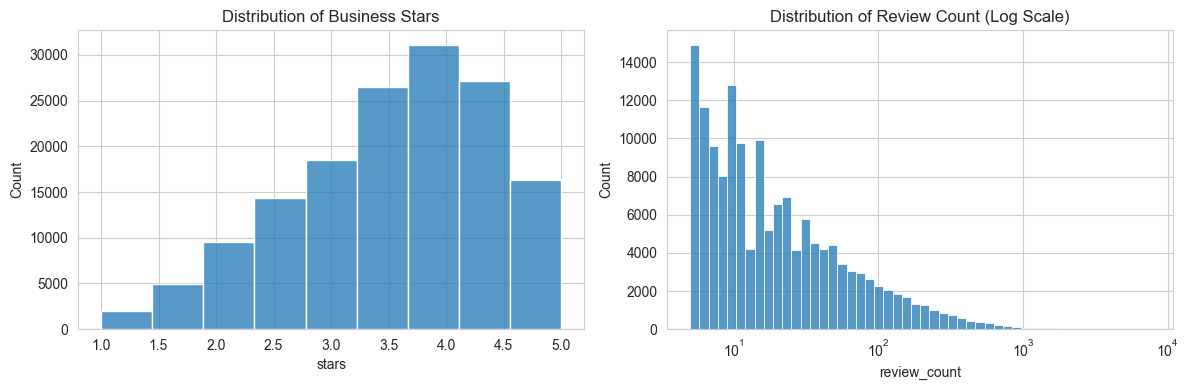

In [8]:
# Explore numerical features
print("\nNumerical Features Description:")
display(df_business[['stars', 'review_count']].describe())

# Plot distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_business['stars'], bins=9, kde=False)
plt.title('Distribution of Business Stars')

plt.subplot(1, 2, 2)
# Using log scale for review_count due to potential skewness
sns.histplot(df_business['review_count'], bins=50, log_scale=True)
plt.title('Distribution of Review Count (Log Scale)')

plt.tight_layout()
plt.show()

In [9]:
# Explore categorical features: City, State, is_open
print("\nTop 10 Cities:")
print(df_business['city'].value_counts().head(10))

print("\nTop 10 States:")
print(df_business['state'].value_counts().head(10))

print("\nIs Open Distribution:")
print(df_business['is_open'].value_counts(normalize=True))


Top 10 Cities:
city
Philadelphia     14569
Tucson            9250
Tampa             9050
Indianapolis      7540
Nashville         6971
New Orleans       6209
Reno              5935
Edmonton          5054
Saint Louis       4827
Santa Barbara     3829
Name: count, dtype: int64

Top 10 States:
state
PA    34039
FL    26330
TN    12056
IN    11247
MO    10913
LA     9924
AZ     9912
NJ     8536
NV     7715
AB     5573
Name: count, dtype: int64

Is Open Distribution:
is_open
1    0.79615
0    0.20385
Name: proportion, dtype: float64


In [10]:
# Explore Categories - focusing on restaurants
# The 'categories' column contains comma-separated strings or None
print("\nHandling Categories:")
# Fill NaN values with an empty string to avoid errors
df_business['categories'] = df_business['categories'].fillna('')

# Check how many businesses are categorized as 'Restaurants'
is_restaurant = df_business['categories'].str.contains('Restaurants', case=False, na=False)
print(f"Number of businesses categorized as Restaurants: {is_restaurant.sum()}")
print(f"Percentage of businesses categorized as Restaurants: {is_restaurant.mean():.2%}")

# Look at the most common categories overall (requires splitting the string)
all_categories = df_business['categories'].str.split(', ').explode()
print("\nTop 20 Most Common Categories Overall:")
print(all_categories.value_counts().head(20))


Handling Categories:
Number of businesses categorized as Restaurants: 52268
Percentage of businesses categorized as Restaurants: 34.77%

Top 20 Most Common Categories Overall:
categories
Restaurants                  52268
Food                         27781
Shopping                     24395
Home Services                14356
Beauty & Spas                14292
Nightlife                    12281
Health & Medical             11890
Local Services               11198
Bars                         11065
Automotive                   10773
Event Planning & Services     9895
Sandwiches                    8366
American (Traditional)        8139
Active Life                   7687
Pizza                         7093
Coffee & Tea                  6703
Fast Food                     6472
Breakfast & Brunch            6239
American (New)                6097
Hotels & Travel               5857
Name: count, dtype: int64


### 3.2 Review Data (`df_review`)

Since the review data is loaded as an iterator, we need to process it chunk by chunk to get overall statistics.

In [ ]:
import collections

Counter = collections.Counter 
total_reviews = 0
review_columns = None
review_dtypes = None
review_non_null_counts = Counter()
review_star_counts = Counter()
review_useful_counts = Counter()
review_funny_counts = Counter()
review_cool_counts = Counter()
review_year_counts = Counter()
review_text_length_sum = 0
review_text_length_sum_sq = 0
review_text_length_min = float('inf')
review_text_length_max = float('-inf')
review_date_min = pd.Timestamp.max # Initialize with latest possible date
review_date_max = pd.Timestamp.min # Initialize with earliest possible date

print("Processing review chunks for aggregation...")
if review_iterator:
    try:
        for i, chunk in enumerate(review_iterator):
            print(f"Processing chunk {i+1}...", end='\r')
            if i == 0:
                # Get column names and dtypes from the first chunk
                review_columns = chunk.columns.tolist()
                review_dtypes = chunk.dtypes.to_dict()

            # Basic Aggregations
            current_chunk_size = len(chunk)
            total_reviews += current_chunk_size
            review_non_null_counts.update(chunk.notnull().sum().to_dict()) # Counts non-nulls per column

            # Value Counts Aggregations (use Counter for efficiency)
            review_star_counts.update(chunk['stars'])
            review_useful_counts.update(chunk['useful'])
            review_funny_counts.update(chunk['funny'])
            review_cool_counts.update(chunk['cool'])

            # Date processing
            chunk['date'] = pd.to_datetime(chunk['date'])
            chunk['year'] = chunk['date'].dt.year
            review_year_counts.update(chunk['year'])
            chunk_date_min = chunk['date'].min()
            chunk_date_max = chunk['date'].max()
            if chunk_date_min < review_date_min:
                review_date_min = chunk_date_min
            if chunk_date_max > review_date_max:
                review_date_max = chunk_date_max

            # Text length processing (handle potential NaN text)
            chunk_text_lengths = chunk['text'].str.len().fillna(0).astype(np.int64) # Ensure numeric, fill NaNs
            review_text_length_sum += chunk_text_lengths.sum()
            review_text_length_sum_sq += (chunk_text_lengths**2).sum() # For variance/std dev calculation
            chunk_text_min = chunk_text_lengths.min()
            chunk_text_max = chunk_text_lengths.max()
            if chunk_text_min < review_text_length_min:
                review_text_length_min = chunk_text_min
            if chunk_text_max > review_text_length_max:
                review_text_length_max = chunk_text_max

            # Optionally, free chunk memory if needed, but usually okay for EDA
            # del chunk
            # gc.collect()

        print(f"\nReview chunk processing complete. Processed {total_reviews} reviews.")

        # Calculate derived statistics after processing all chunks
        if total_reviews > 0:
            review_text_length_mean = review_text_length_sum / total_reviews
            # Var = E[X^2] - (E[X])^2
            review_text_length_var = (review_text_length_sum_sq / total_reviews) - (review_text_length_mean**2)
             # Handle potential floating point inaccuracies leading to negative variance
            review_text_length_std = np.sqrt(max(0, review_text_length_var))
        else:
            review_text_length_mean = np.nan
            review_text_length_std = np.nan
            review_text_length_min = np.nan
            review_text_length_max = np.nan
            review_date_min = pd.NaT
            review_date_max = pd.NaT


    except Exception as e:
        print(f"\nAn error occurred during review chunk processing: {e}")
        # Reset aggregators to indicate failure / partial results
        total_reviews = 0
else:
    print("Review iterator is not available (file might not exist or failed to load). Cannot process reviews.")

Processing review chunks for aggregation...
Processing chunk 70...
Review chunk processing complete. Processed 6990280 reviews.


In [12]:
print("\nAggregated Review Data Info:")
if total_reviews > 0 and review_columns:
    print(f"Total Reviews Processed: {total_reviews}")
    print(f"Columns: {review_columns}")
    # print(f"Data Types (from first chunk): {review_dtypes}") # Can be long

    print("\nAggregated Non-Null Counts:")
    for col, count in sorted(review_non_null_counts.items()):
        print(f"- {col}: {count}")

    print("\nAggregated Missing Value Counts:")
    missing_found = False
    for col in review_columns:
        # Total count for a column is the sum of its non-null count and missing count
        # Missing = Total Reviews - Non-Null Count
        missing_count = total_reviews - review_non_null_counts.get(col, 0)
        if missing_count > 0:
            print(f"- {col}: {missing_count} ({missing_count / total_reviews:.2%})")
            missing_found = True
    if not missing_found:
        print("No missing values found in processed review columns.")
else:
    print("No review data was processed successfully.")


Aggregated Review Data Info:
Total Reviews Processed: 6990280
Columns: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']

Aggregated Non-Null Counts:
- business_id: 6990280
- cool: 6990280
- date: 6990280
- funny: 6990280
- review_id: 6990280
- stars: 6990280
- text: 6990280
- useful: 6990280
- user_id: 6990280

Aggregated Missing Value Counts:
No missing values found in processed review columns.



Plotting Aggregated Review Distributions:


C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\151342920.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stars, y=counts, palette='viridis', order=stars) # Ensure order
C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\151342920.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=useful_vals, y=useful_counts_val, palette='Blues')
C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\151342920.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funny_vals, y=funny_counts_val, palette='Oranges')
C:\Users\wiztu\AppData\Local\Temp\ip

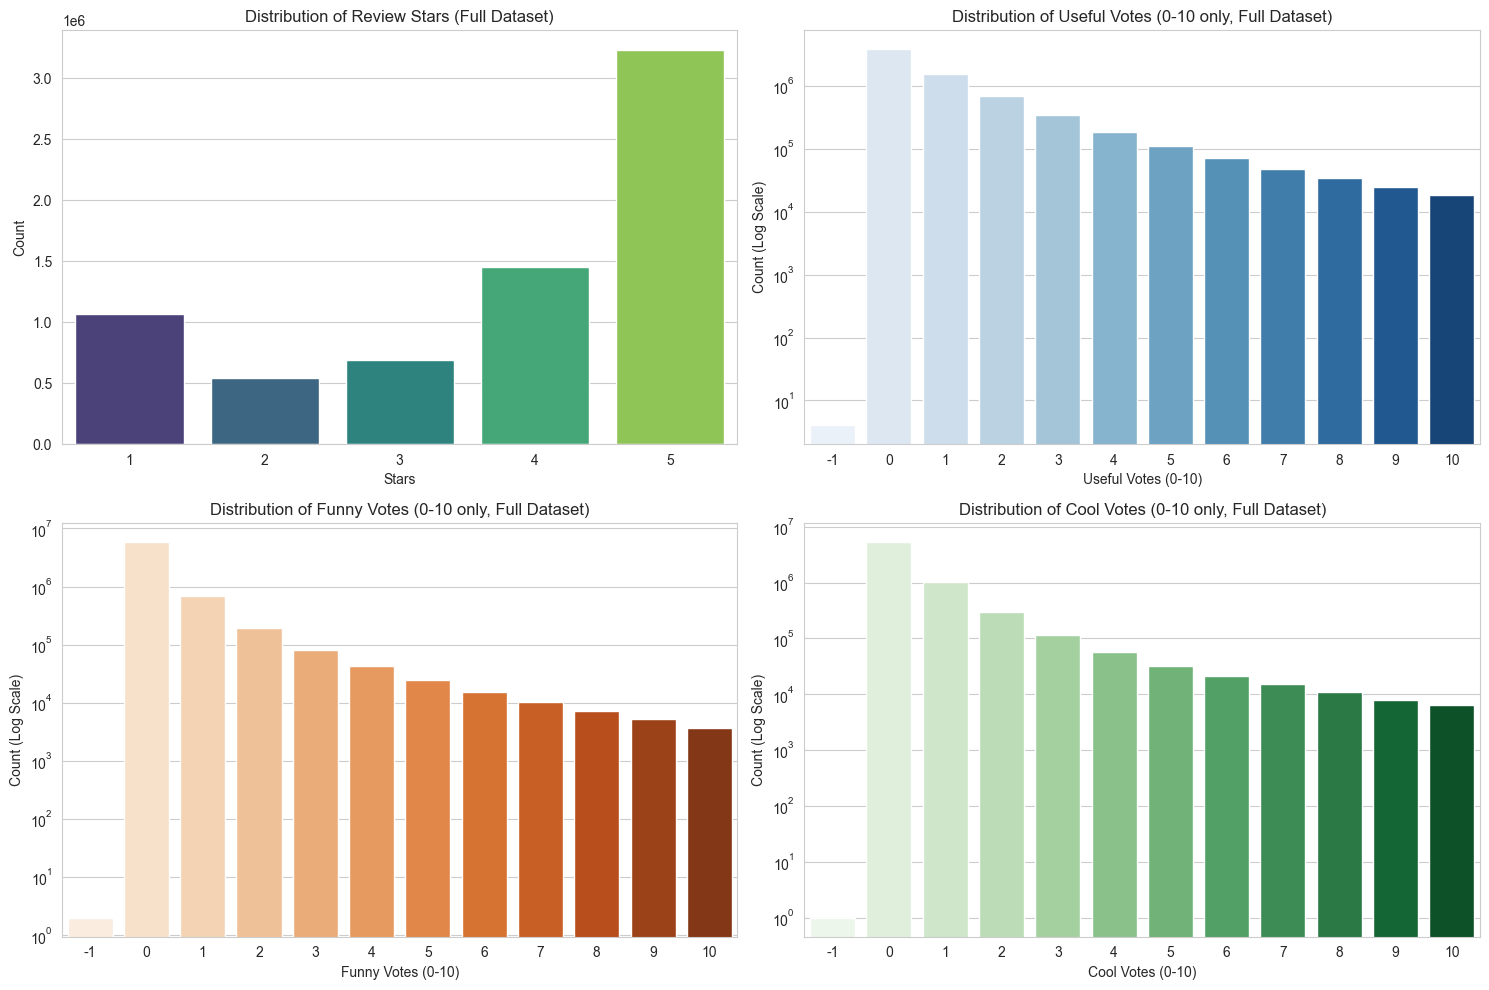

In [13]:
if total_reviews > 0:
    print("\nPlotting Aggregated Review Distributions:")

    plt.figure(figsize=(15, 10)) # Adjusted figure size

    # Stars Distribution
    plt.subplot(2, 2, 1)
    # Sort items by star rating for correct plotting order
    star_data = sorted(review_star_counts.items())
    stars = [item[0] for item in star_data]
    counts = [item[1] for item in star_data]
    sns.barplot(x=stars, y=counts, palette='viridis', order=stars) # Ensure order
    plt.title('Distribution of Review Stars (Full Dataset)')
    plt.xlabel('Stars')
    plt.ylabel('Count')

    # Useful Votes Distribution (Log Scale on Y)
    # Plotting full distribution often looks bad due to extreme skew.
    # Show counts for 0-10 votes for better visibility.
    plt.subplot(2, 2, 2)
    useful_data = sorted([item for item in review_useful_counts.items() if item[0] <= 10]) # Filter for 0-10
    useful_vals = [item[0] for item in useful_data]
    useful_counts_val = [item[1] for item in useful_data]
    if useful_vals: # Check if there is data to plot
      sns.barplot(x=useful_vals, y=useful_counts_val, palette='Blues')
      plt.title('Distribution of Useful Votes (0-10 only, Full Dataset)')
      plt.xlabel('Useful Votes (0-10)')
      plt.ylabel('Count (Log Scale)')
      plt.yscale('log') # Apply log scale to y-axis
    else:
      plt.title('No Useful Votes data (0-10) to display')

    # Funny Votes Distribution (Log Scale on Y)
    plt.subplot(2, 2, 3)
    funny_data = sorted([item for item in review_funny_counts.items() if item[0] <= 10])
    funny_vals = [item[0] for item in funny_data]
    funny_counts_val = [item[1] for item in funny_data]
    if funny_vals:
      sns.barplot(x=funny_vals, y=funny_counts_val, palette='Oranges')
      plt.title('Distribution of Funny Votes (0-10 only, Full Dataset)')
      plt.xlabel('Funny Votes (0-10)')
      plt.ylabel('Count (Log Scale)')
      plt.yscale('log')
    else:
      plt.title('No Funny Votes data (0-10) to display')


    # Cool Votes Distribution (Log Scale on Y)
    plt.subplot(2, 2, 4)
    cool_data = sorted([item for item in review_cool_counts.items() if item[0] <= 10])
    cool_vals = [item[0] for item in cool_data]
    cool_counts_val = [item[1] for item in cool_data]
    if cool_vals:
      sns.barplot(x=cool_vals, y=cool_counts_val, palette='Greens')
      plt.title('Distribution of Cool Votes (0-10 only, Full Dataset)')
      plt.xlabel('Cool Votes (0-10)')
      plt.ylabel('Count (Log Scale)')
      plt.yscale('log')
    else:
      plt.title('No Cool Votes data (0-10) to display')


    plt.tight_layout()
    plt.show()

else:
    print("No aggregated review data to plot distributions.")


Exploring Review Dates (Full Dataset):
Date range: 2005-02-16 03:23:22 to 2022-01-19 19:48:45


C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\2432051832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=year_counts, palette='magma')


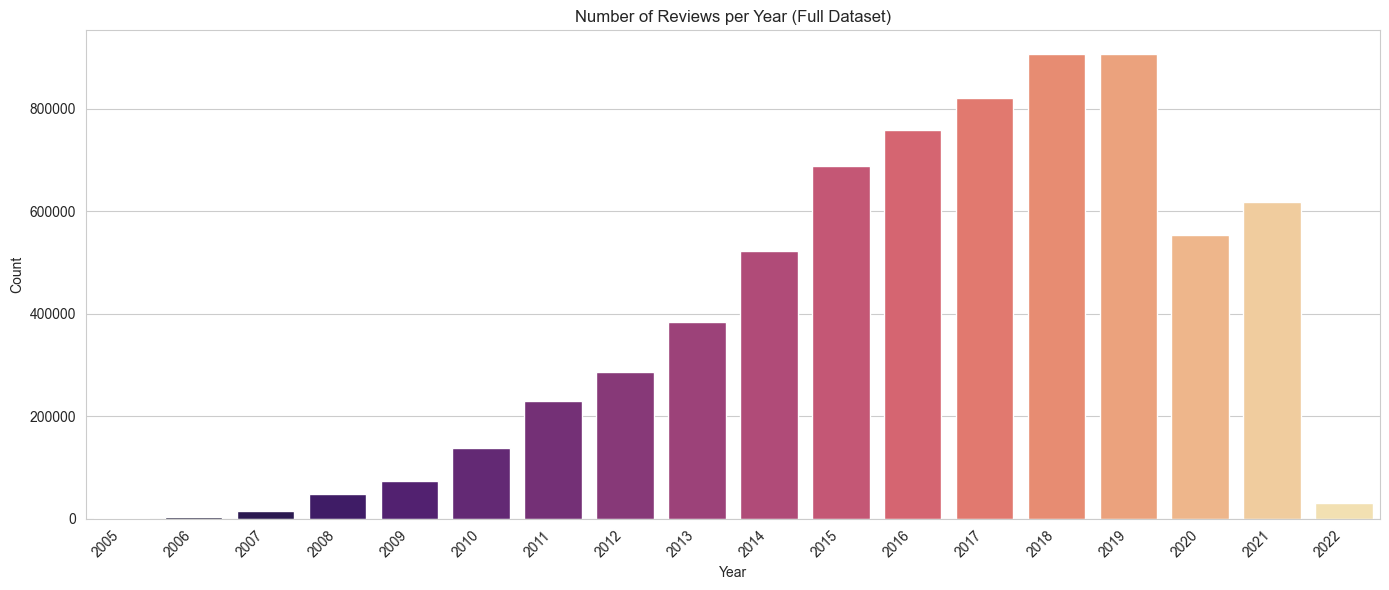

In [14]:
# Explore Date based on aggregated counts
if total_reviews > 0 and review_year_counts:
    print("\nExploring Review Dates (Full Dataset):")
    print(f"Date range: {review_date_min} to {review_date_max}")

    # Plot number of reviews over years using aggregated counts
    year_data = sorted(review_year_counts.items())
    years = [item[0] for item in year_data]
    year_counts = [item[1] for item in year_data]

    plt.figure(figsize=(14, 6)) # Wider plot for years
    sns.barplot(x=years, y=year_counts, palette='magma')
    plt.title('Number of Reviews per Year (Full Dataset)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate and align

    # Improve x-tick visibility if many years
    ax = plt.gca()
    if len(years) > 20:
        # Show every Nth tick to prevent overlap
        tick_skip = max(1, len(years) // 20) # Calculate skip, ensuring it's at least 1
        visible_ticks = ax.get_xticks()[::tick_skip]
        visible_labels = [label.get_text() for label in ax.get_xticklabels()][::tick_skip]
        ax.set_xticks(visible_ticks)
        ax.set_xticklabels(visible_labels)
    elif len(years) == 0:
        plt.xticks([]) # No ticks if no years

    plt.tight_layout()
    plt.show()
else:
    print("No review date data processed to explore.")

In [15]:
# Explore Review Text Length based on aggregated stats
if total_reviews > 0:
    print("\nAggregated Review Text Length Statistics (Full Dataset):")
    print(f"Min text length: {review_text_length_min}")
    print(f"Max text length: {review_text_length_max}")
    print(f"Mean text length: {review_text_length_mean:.2f}")
    print(f"Std dev text length: {review_text_length_std:.2f}")

    # Note: Plotting an accurate histogram requires storing more detailed info
    # (like bin counts or a sample of lengths) during chunk processing.
    # Displaying the statistics provides a good overview.
    # A histogram could be generated from the sample created later (Section 4).
else:
    print("No review data processed to calculate text length stats.")



Aggregated Review Text Length Statistics (Full Dataset):
Min text length: 1
Max text length: 5000
Mean text length: 567.76
Std dev text length: 527.26


### 3.3 User Data (`df_user`)

In [16]:
if df_user is not None:
    print("User Data Info:")
    df_user.info()
    print("\nMissing Values (%):")
    # Checking for 'None' strings which might act as NaNs in 'friends' and 'elite'
    print((df_user.isnull().sum() / len(df_user) * 100).sort_values(ascending=False))
    print("\nCounts of 'None' string in 'friends':", (df_user['friends'] == 'None').sum())
    print("Counts of 'None' or '' string in 'elite':", ((df_user['elite'] == 'None') | (df_user['elite'] == '')).sum())
else:
    print("User data was not loaded. Skipping exploration.")

User Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB

Missing Value


Numerical Features Description:


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


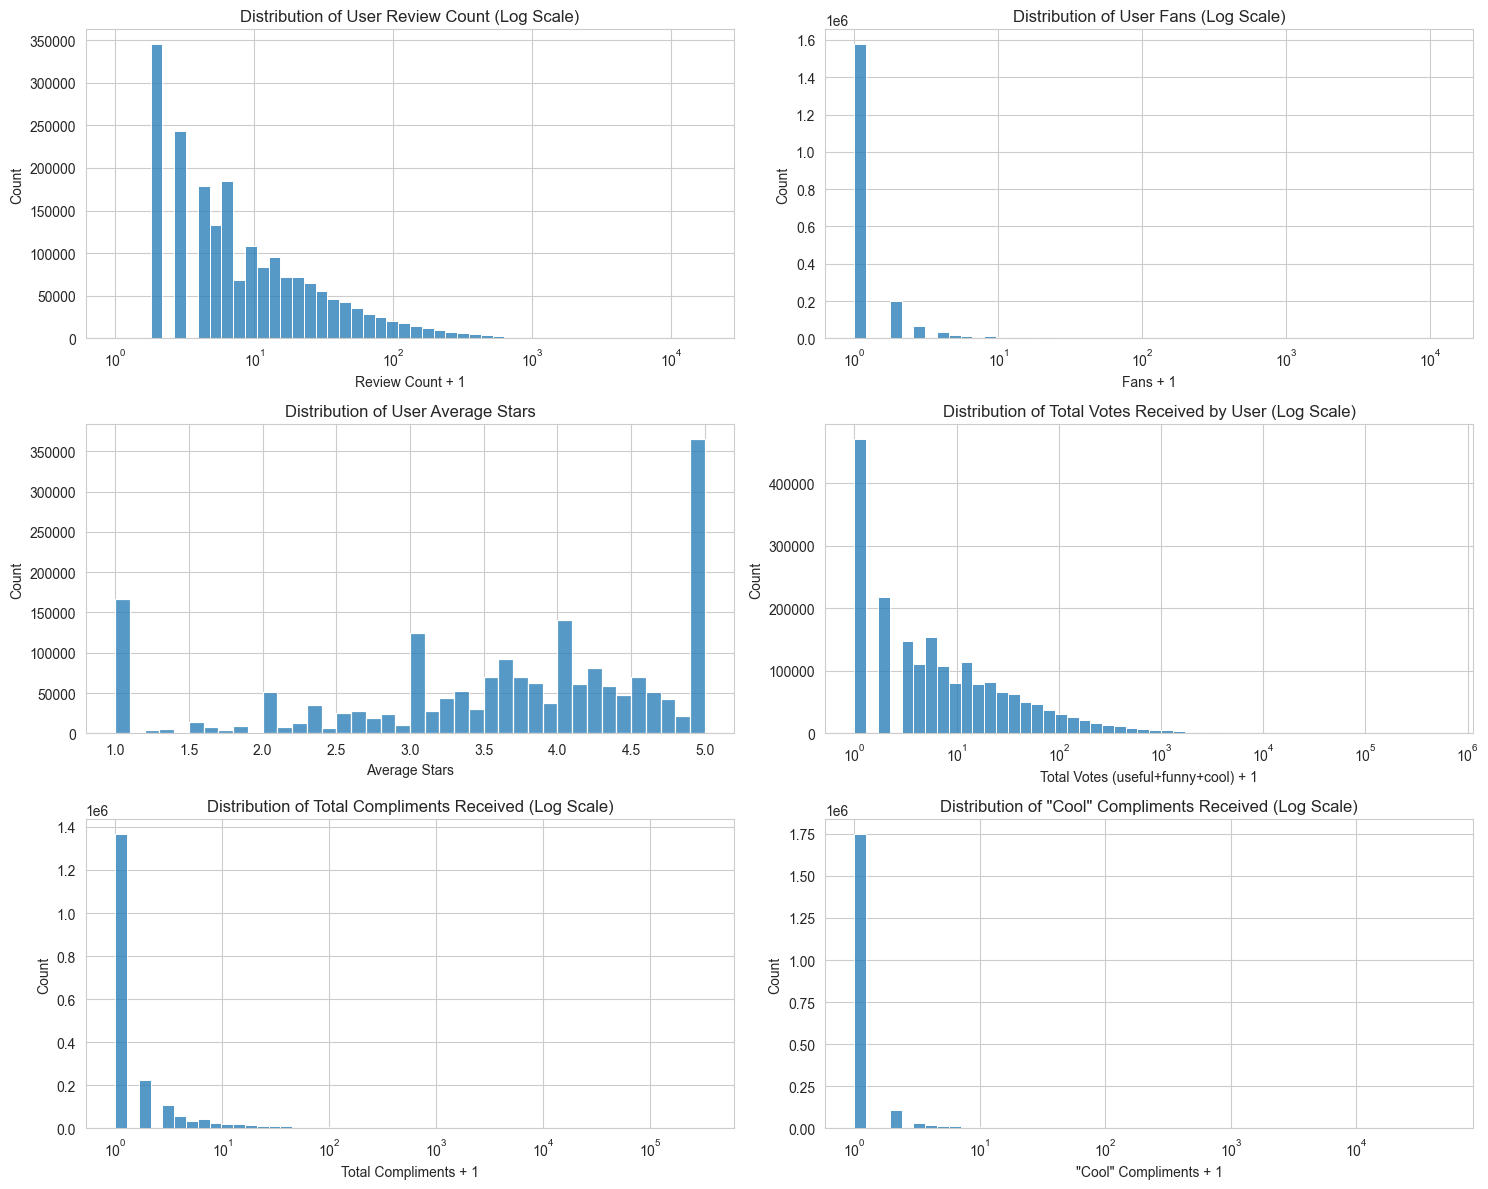

In [17]:
# Explore numerical features: review_count, fans, average_stars, votes, compliments (only if loaded)
if df_user is not None:
    print("\nNumerical Features Description:")
    cols_to_describe = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
                        'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute',
                        'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool',
                        'compliment_funny', 'compliment_writer', 'compliment_photos']
    # Filter out columns that might not exist if dataset schema changed
    cols_to_describe = [col for col in cols_to_describe if col in df_user.columns]
    display(df_user[cols_to_describe].describe())

    # Add helper columns for total votes and compliments before plotting
    df_user['total_votes'] = df_user['useful'] + df_user['funny'] + df_user['cool']
    compliment_cols = [col for col in df_user.columns if col.startswith('compliment_')]
    df_user['total_compliments'] = df_user[compliment_cols].sum(axis=1)


    # Plot distributions for key numerical features (using log scale where needed)
    plt.figure(figsize=(15, 12)) # Increased size for more plots

    plt.subplot(3, 2, 1) # Changed grid to 3x2
    sns.histplot(df_user['review_count'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of User Review Count (Log Scale)')
    plt.xlabel('Review Count + 1')

    plt.subplot(3, 2, 2)
    sns.histplot(df_user['fans'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of User Fans (Log Scale)')
    plt.xlabel('Fans + 1')

    plt.subplot(3, 2, 3)
    sns.histplot(df_user['average_stars'], bins=40, kde=False) # More bins for average stars
    plt.title('Distribution of User Average Stars')
    plt.xlabel('Average Stars')


    plt.subplot(3, 2, 4)
    sns.histplot(df_user['total_votes'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of Total Votes Received by User (Log Scale)')
    plt.xlabel('Total Votes (useful+funny+cool) + 1')


    plt.subplot(3, 2, 5)
    sns.histplot(df_user['total_compliments'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of Total Compliments Received (Log Scale)')
    plt.xlabel('Total Compliments + 1')

    # Added: Distribution of one specific compliment type for comparison
    plt.subplot(3, 2, 6)
    sns.histplot(df_user['compliment_cool'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of "Cool" Compliments Received (Log Scale)')
    plt.xlabel('"Cool" Compliments + 1')


    plt.tight_layout()
    plt.show()
else:
    print("User data was not loaded. Skipping numerical exploration.")


Exploring Yelping Since:
Yelping since range: 2004-10-12 08:46:11 to 2022-01-19 17:15:47


C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\1564413281.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='join_year', data=df_user.sort_values('join_year'), palette='coolwarm')


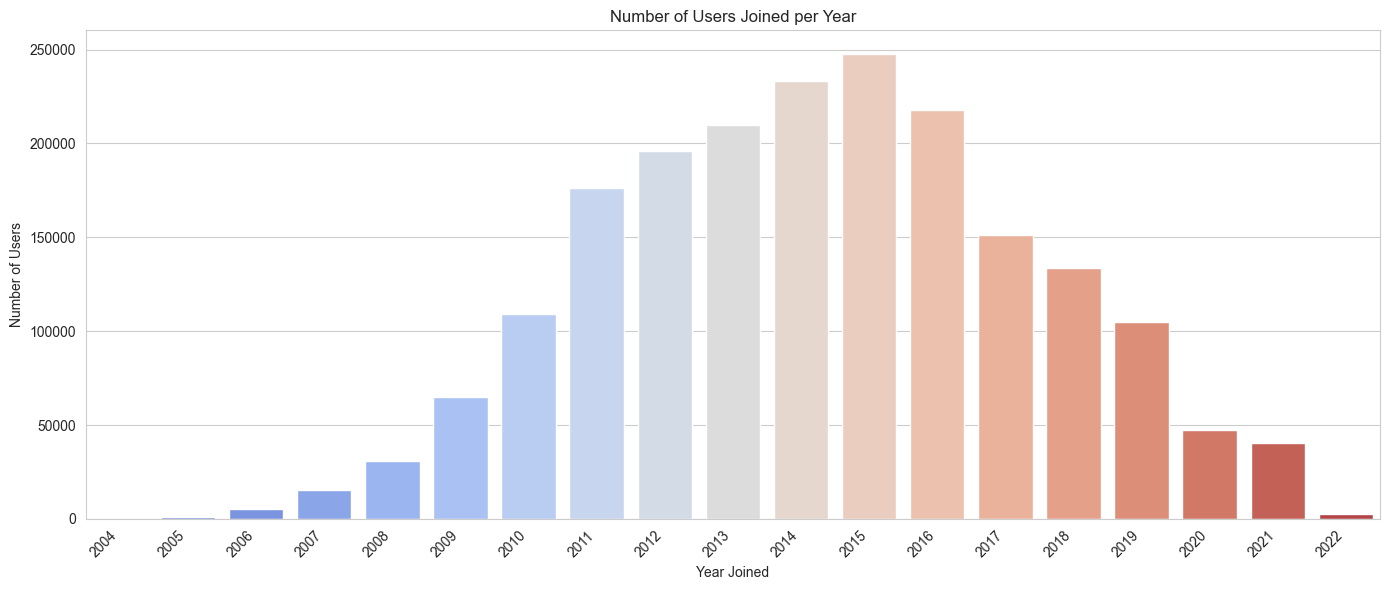

In [18]:
if df_user is not None:
    print("\nExploring Yelping Since:")
    # Convert 'yelping_since' to datetime (handle potential errors)
    df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'], errors='coerce')
    # Drop rows where conversion failed, if any
    original_len = len(df_user)
    df_user.dropna(subset=['yelping_since'], inplace=True)
    if len(df_user) < original_len:
        print(f"Dropped {original_len - len(df_user)} users due to invalid 'yelping_since' date.")

    df_user['join_year'] = df_user['yelping_since'].dt.year

    print(f"Yelping since range: {df_user['yelping_since'].min()} to {df_user['yelping_since'].max()}")

    # Plot number of users joined over years
    plt.figure(figsize=(14, 6))
    sns.countplot(x='join_year', data=df_user.sort_values('join_year'), palette='coolwarm')
    plt.title('Number of Users Joined per Year')
    plt.xlabel('Year Joined')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45, ha='right')

    # Improve x-tick visibility if many years
    ax = plt.gca()
    years = sorted(df_user['join_year'].unique())
    if len(years) > 20:
        tick_skip = max(1, len(years) // 20)
        ax.set_xticks(ax.get_xticks()[::tick_skip]) # Apply skip to existing tick positions
    elif len(years) == 0:
        plt.xticks([])

    plt.tight_layout()
    plt.show()
else:
    print("User data was not loaded. Skipping 'yelping_since' exploration.")


Exploring Friends and Elite Status:

Friend Count and Elite Years Description:


,num_friends,num_elite_years
count,1.987897e+06,1.987897e+06
mean,5.293306e+01,1.914063e-01
std,1.466023e+02,1.054780e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00
75%,4.600000e+01,0.000000e+00
max,1.499500e+04,1.700000e+01


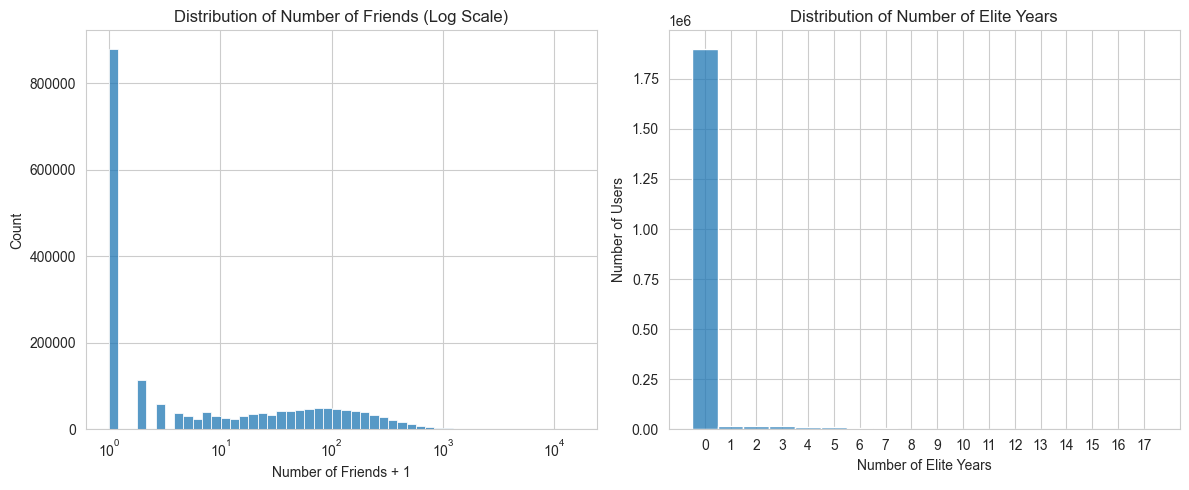

In [19]:
# Explore Friends and Elite Status (only if loaded)
if df_user is not None:
    print("\nExploring Friends and Elite Status:")
    # Calculate number of friends (friends column is a comma-separated string of user_ids)
    # Handle 'None' string explicitly
    df_user['num_friends'] = df_user['friends'].apply(lambda x: 0 if x == 'None' else len(x.split(',')))

    # Calculate number of elite years (elite column is a comma-separated string of years)
    # Handle 'None' and empty string '' explicitly
    df_user['num_elite_years'] = df_user['elite'].apply(lambda x: 0 if (x == 'None' or x == '') else len(x.split(',')))

    print("\nFriend Count and Elite Years Description:")
    display(df_user[['num_friends', 'num_elite_years']].describe())

    # Plot distributions
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_user['num_friends'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of Number of Friends (Log Scale)')
    plt.xlabel('Number of Friends + 1')


    plt.subplot(1, 2, 2)
    max_elite_years = df_user['num_elite_years'].max()
    # Use discrete bins covering the range 0 to max_elite_years
    sns.histplot(df_user['num_elite_years'], bins=max_elite_years + 1, discrete=True)
    plt.title('Distribution of Number of Elite Years')
    plt.xlabel('Number of Elite Years')
    plt.ylabel('Number of Users')
    plt.xticks(range(0, max_elite_years + 1, max(1, max_elite_years // 10))) # Adjust ticks based on range


    plt.tight_layout()
    plt.show()
else:
    print("User data was not loaded. Skipping Friends/Elite exploration.")


### 3.4 Checkin Data (`df_checkin`)

In [20]:
# Re-check basic info and check for missing values (only if loaded)
if df_checkin is not None:
    print("Checkin Data Info:")
    df_checkin.info()
    print("\nMissing Values (%):")
    print((df_checkin.isnull().sum() / len(df_checkin) * 100).sort_values(ascending=False))
else:
    print("Checkin data was not loaded. Skipping exploration.")

Checkin Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB

Missing Values (%):
business_id    0.0
date           0.0
dtype: float64



Checkin Count Description:


count    131930.000000
mean        101.242136
std         417.132327
min           1.000000
25%           6.000000
50%          20.000000
75%          72.000000
max       52144.000000
Name: num_checkins, dtype: float64

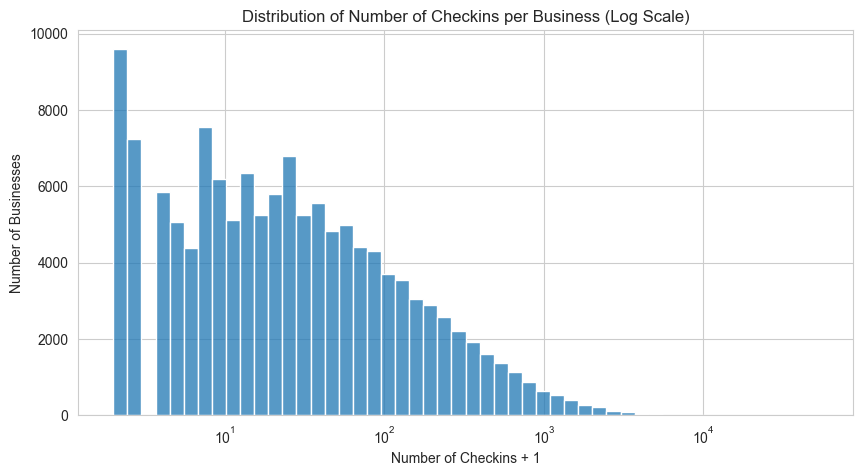


Business with most checkins:


,business_id,date,num_checkins
878,-QI8Qi8XWH3D8y8ethnajA,"2010-01-17 16:30:46, 2010-01-18 20:17:55, 2010...",52144


In [21]:
# Explore Checkin Counts (only if loaded)
if df_checkin is not None:
    # The 'date' column is a string of comma-separated timestamps
    # Calculate the number of checkins for each business
    # Handle potential non-string values if any (though unlikely based on schema)
    df_checkin['num_checkins'] = df_checkin['date'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

    print("\nCheckin Count Description:")
    display(df_checkin['num_checkins'].describe())

    # Plot distribution of checkin counts (log scale)
    plt.figure(figsize=(10, 5))
    sns.histplot(df_checkin['num_checkins'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of Number of Checkins per Business (Log Scale)')
    plt.xlabel('Number of Checkins + 1')
    plt.ylabel('Number of Businesses')
    plt.show()

    # Example: Business with the most checkins
    try:
        most_checkins_idx = df_checkin['num_checkins'].idxmax()
        print("\nBusiness with most checkins:")
        display(df_checkin.loc[[most_checkins_idx]]) # Use double brackets to get DataFrame view
    except ValueError:
        print("\nCould not find business with most checkins (DataFrame might be empty).")

else:
    print("Checkin data was not loaded. Skipping checkin count exploration.")

### 3.5 Tip Data (`df_tip`)

In [22]:
# Re-check basic info and check for missing values (only if loaded)
if df_tip is not None:
    print("Tip Data Info:")
    df_tip.info()
    print("\nMissing Values (%):")
    print((df_tip.isnull().sum() / len(df_tip) * 100).sort_values(ascending=False))
else:
    print("Tip data was not loaded. Skipping exploration.")

Tip Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB

Missing Values (%):
user_id             0.0
business_id         0.0
text                0.0
date                0.0
compliment_count    0.0
dtype: float64



Compliment Count Description:


count    908915.000000
mean          0.012525
std           0.120763
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: compliment_count, dtype: float64

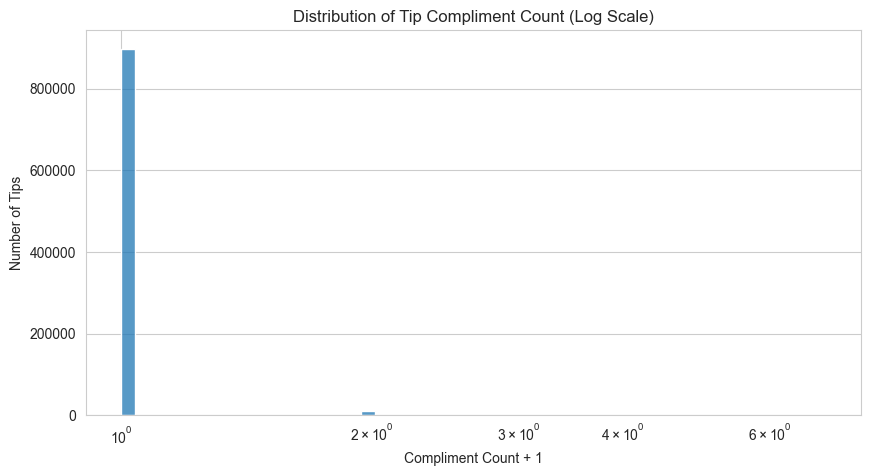

In [23]:
# Explore numerical features: compliment_count (only if loaded)
if df_tip is not None:
    print("\nCompliment Count Description:")
    display(df_tip['compliment_count'].describe())

    # Plot distribution of compliment counts (log scale)
    plt.figure(figsize=(10, 5))
    sns.histplot(df_tip['compliment_count'] + 1, bins=50, log_scale=True)
    plt.title('Distribution of Tip Compliment Count (Log Scale)')
    plt.xlabel('Compliment Count + 1')
    plt.ylabel('Number of Tips')
    plt.show()
else:
    print("Tip data was not loaded. Skipping compliment count exploration.")


Tip Text Length Description:


count    908915.000000
mean         62.580226
std          57.828705
min           1.000000
25%          28.000000
50%          49.000000
75%          76.000000
max         500.000000
Name: text_length, dtype: float64

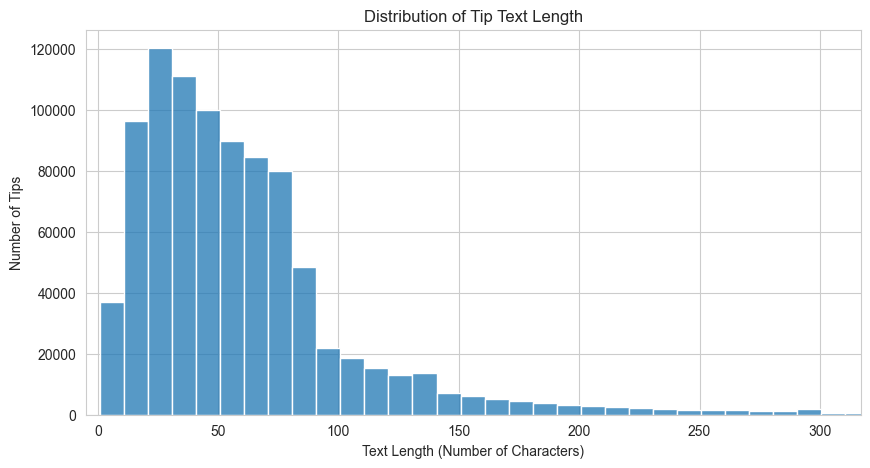

In [24]:
# Explore Tip Text Length (only if loaded)
if df_tip is not None:
    df_tip['text_length'] = df_tip['text'].str.len().fillna(0).astype(int)

    print("\nTip Text Length Description:")
    display(df_tip['text_length'].describe())

    # Plot distribution of text length
    plt.figure(figsize=(10, 5))
    sns.histplot(df_tip['text_length'], bins=50, kde=False) # KDE might be slow/less informative here
    plt.title('Distribution of Tip Text Length')
    plt.xlabel('Text Length (Number of Characters)')
    plt.ylabel('Number of Tips')
    # Tips are shorter, adjust xlim if needed based on describe()
    # Show up to 99th percentile for better view of common lengths
    upper_limit = df_tip['text_length'].quantile(0.99)
    plt.xlim(-5, upper_limit + 5) # Add some padding
    plt.show()
else:
    print("Tip data was not loaded. Skipping text length exploration.")


Exploring Tip Dates:
Date range: 2009-04-16 13:11:49 to 2022-01-19 20:38:55


C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\2597557935.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df_tip.sort_values('year'), palette='plasma')


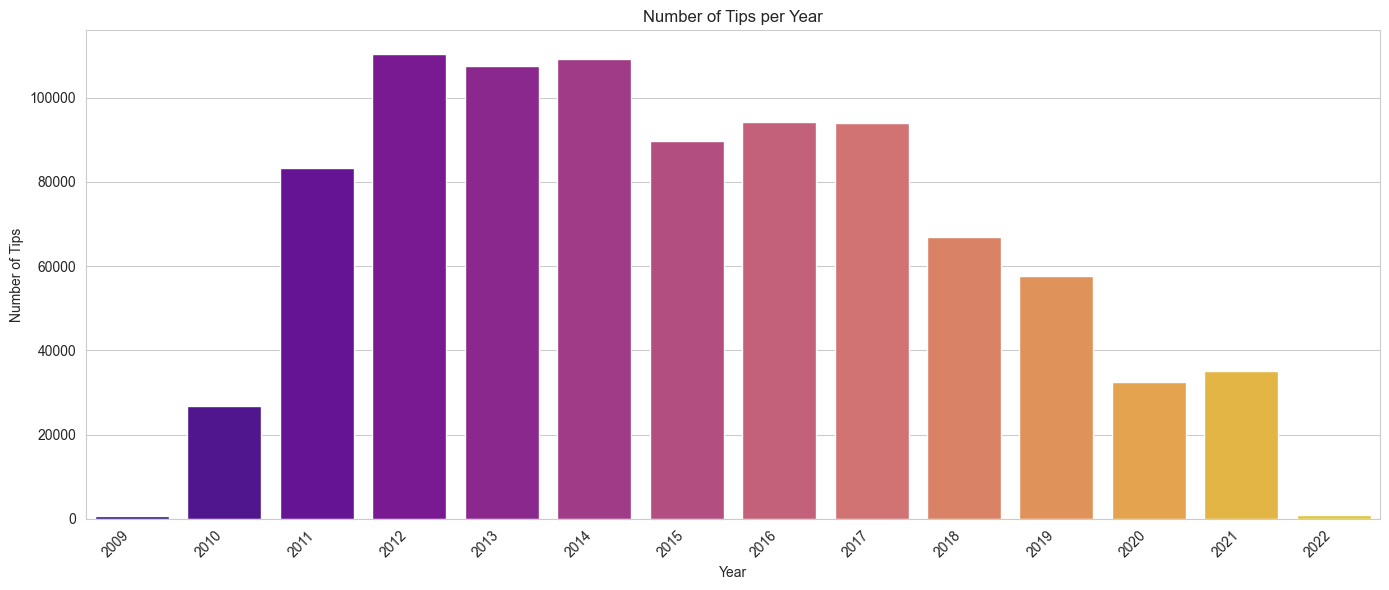

In [25]:
# Explore Tip Date (only if loaded)
if df_tip is not None:
    print("\nExploring Tip Dates:")
    df_tip['date'] = pd.to_datetime(df_tip['date'], errors='coerce')
    original_len_tip = len(df_tip)
    df_tip.dropna(subset=['date'], inplace=True)
    if len(df_tip) < original_len_tip:
        print(f"Dropped {original_len_tip - len(df_tip)} tips due to invalid 'date'.")

    df_tip['year'] = df_tip['date'].dt.year

    if not df_tip.empty:
        print(f"Date range: {df_tip['date'].min()} to {df_tip['date'].max()}")

        # Plot number of tips over years
        plt.figure(figsize=(14, 6))
        sns.countplot(x='year', data=df_tip.sort_values('year'), palette='plasma')
        plt.title('Number of Tips per Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Tips')
        plt.xticks(rotation=45, ha='right')

        # Improve x-tick visibility if many years
        ax = plt.gca()
        years = sorted(df_tip['year'].unique())
        if len(years) > 20:
            tick_skip = max(1, len(years) // 20)
            ax.set_xticks(ax.get_xticks()[::tick_skip])
        elif len(years) == 0:
            plt.xticks([])

        plt.tight_layout()
        plt.show()
    else:
        print("No valid tip dates to plot.")
else:
    print("Tip data was not loaded. Skipping date exploration.")

## 4. Relationship Analysis

Explore relationships between different dataframes, e.g., reviews and businesses.

### 4.1 Merging DataFrames & Sampling

To analyze relationships without loading all reviews, we'll process review chunks, merge them with business/user data, take a random sample from each merged chunk, and combine the samples.

In [26]:
import gc

# Re-initialize the review iterator and prepare for sampling
merged_samples = []
sample_frac = 0.05  # Sample 1% from each merged chunk (adjust as needed for memory/representativeness)
total_sampled_reviews = 0
df_merged_sample = pd.DataFrame() # Initialize empty DataFrame

# Ensure df_business and df_user were loaded before attempting merge
if df_business is not None and df_user is not None:
    print(f"Starting merge and sample process (sampling {sample_frac:.1%} from each chunk)...")
    review_iterator_merge = None # Initialize
    try:
        # Re-create the iterator as it was exhausted during aggregation
        review_iterator_merge = pd.read_json(review_path, lines=True, chunksize=chunk_size)

        # Select only necessary columns for merging to save memory
        business_cols = ['business_id', 'name', 'city', 'state', 'categories', 'stars', 'review_count']
        user_cols = ['user_id', 'name', 'average_stars', 'fans', 'review_count', 'yelping_since', 'num_friends', 'num_elite_years'] # Assumes num_friends etc. were calculated

        # Ensure columns exist in the respective dataframes
        business_cols = [col for col in business_cols if col in df_business.columns]
        user_cols = [col for col in user_cols if col in df_user.columns]

        df_business_subset = df_business[business_cols].copy()
        df_user_subset = df_user[user_cols].copy()

        for i, review_chunk in enumerate(review_iterator_merge):
            print(f"Processing chunk {i+1} for merge/sample...", end='\r')

            # Add review text length to the chunk before merging
            review_chunk['text_length_review'] = review_chunk['text'].str.len().fillna(0).astype(int)

            # Merge review chunk with business data subset
            merged_chunk_biz = pd.merge(
                review_chunk,
                df_business_subset,
                on='business_id',
                how='left',
                suffixes=('_review', '_business') # Suffixes avoid column name clashes
            )

            # Merge the result with user data subset
            merged_chunk_user = pd.merge(
                merged_chunk_biz,
                df_user_subset,
                on='user_id',
                how='left',
                suffixes=('', '_user') # User name/review_count clash resolved here
            )

            # Rename columns for clarity after merge (adjust based on actual clashes and suffixes)
            merged_chunk_user.rename(columns={
                'name': 'user_name', # Renaming the user name column after merge
                'review_count': 'user_review_count', # Renaming user review count
                'stars_review': 'stars_review', # Already suffixed correctly by first merge
                'stars_business': 'stars_business', # Already suffixed correctly by first merge
                'review_count_business': 'review_count_business', # Already suffixed correctly by first merge
                'average_stars': 'user_avg_stars', # User average stars (no suffix needed if unique)
                'yelping_since': 'user_yelping_since' # User yelping since (no suffix needed if unique)
             }, inplace=True, errors='ignore') # Ignore errors if column doesn't exist

            # Take a random sample from the fully merged chunk
            # Ensure chunk is not empty before sampling
            if not merged_chunk_user.empty:
                sample = merged_chunk_user.sample(frac=sample_frac, random_state=42) # Use random_state for reproducibility
                merged_samples.append(sample)
                total_sampled_reviews += len(sample)

        # Concatenate all samples into a single DataFrame if samples were collected
        if merged_samples:
            df_merged_sample = pd.concat(merged_samples, ignore_index=True)
            print(f"\nMerge and sample process complete. Final sample size: {len(df_merged_sample)} reviews ({total_sampled_reviews} total sampled).")
            df_merged_sample.info()
            # Display head of the sampled dataframe
            print("\nHead of the sampled merged data:")
            display(df_merged_sample.head())
        else:
            print("\nNo samples collected during the process. Merged sample DataFrame is empty.")

    except FileNotFoundError:
        print(f"\nError: Review file not found at {review_path} during merge/sample.")
    except Exception as e:
        print(f"\nError during merge and sample process: {e}")
        df_merged_sample = pd.DataFrame() # Ensure it's an empty df on error
    finally:
        # Clean up iterator and subsets
        del review_iterator_merge, df_business_subset, df_user_subset, merged_samples, merged_chunk_biz, merged_chunk_user
        if 'sample' in locals(): del sample # Delete sample if it exists
        gc.collect()
else:
    print("Skipping merge and sample process because Business or User data was not loaded.")

Starting merge and sample process (sampling 5.0% from each chunk)...
Processing chunk 70 for merge/sample...
Merge and sample process complete. Final sample size: 349514 reviews (349514 total sampled).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349514 entries, 0 to 349513
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_id           349514 non-null  object        
 1   user_id             349514 non-null  object        
 2   business_id         349514 non-null  object        
 3   stars_review        349514 non-null  int64         
 4   useful              349514 non-null  int64         
 5   funny               349514 non-null  int64         
 6   cool                349514 non-null  int64         
 7   text                349514 non-null  object        
 8   date                349514 non-null  datetime64[ns]
 9   text_length_review  349514 non-null  int32         
 10

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,text_length_review,...,categories,stars_business,user_review_count,name_user,user_avg_stars,fans,review_count_user,user_yelping_since,num_friends,num_elite_years
0,MhKsttHvo3deXn4qM0-PFw,ecrYpAcwE22gWVsWoNvthQ,pqe1pCQx--uybdm6EQ8AqQ,3,0,0,0,I love elevation burger but they need to clean...,2016-01-06 21:32:21,100,...,"American (New), Vegetarian, Restaurants, Burgers",3.0,202,Beatriz,4.00,0.0,2.0,2015-10-23 19:48:08,272.0,0.0
1,oakWLs2eYhIHA0KucrRaEA,-psFb4sFsOm0oRLY2Kye0A,AdT6vMVYy2uFFfnYbWoAsw,5,0,0,0,This is by far the best pizza place in Henders...,2015-05-17 00:43:46,171,...,"Restaurants, Pizza",4.0,123,Nathan,4.83,0.0,28.0,2013-09-16 15:35:32,29.0,0.0
2,U5QAKIYquWGtZPqkw52wTQ,IoS8IZai5Yfa3ULgO1ktKw,Ix9p19oZJOdaIGjU9lElyA,2,1,0,0,I've heard a lot about Five Guys for years and...,2012-04-29 01:40:46,597,...,"Fast Food, Restaurants, American (New), Burgers",3.5,35,Jerry,3.46,11.0,132.0,2010-08-18 21:19:58,231.0,0.0
3,nAeBofdKl-1GQiPl7WJb1Q,VhcRO_eyARVDRKvrLLJuCQ,GBTPC53ZrG1ZBY3DT8Mbcw,5,0,0,0,"Rich and Kenny were awesome. Hilarious guys, a...",2018-08-15 02:44:18,275,...,"German, Restaurants, Seafood, Cocktail Bars, F...",4.0,4554,Colton,4.85,0.0,13.0,2016-05-31 12:26:45,142.0,0.0
4,MP6eIyOlsbBq561crfj15w,z04JR9Gt26vIQHk83PPWBw,PY9GRfzr4nTZeINf346QOw,5,0,0,0,I LOVE THIS PLACE! In the off season the rooms...,2012-01-11 02:58:22,477,...,"Event Planning & Services, Casinos, Beauty & S...",4.0,2486,Corinna,3.85,0.0,46.0,2011-04-06 21:53:58,85.0,0.0


### 4.2 Exploring Relationships

Analyze correlations and patterns in the merged data.

C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\1838826667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars_business', y='stars_review', data=df_merged_sample, palette='coolwarm')


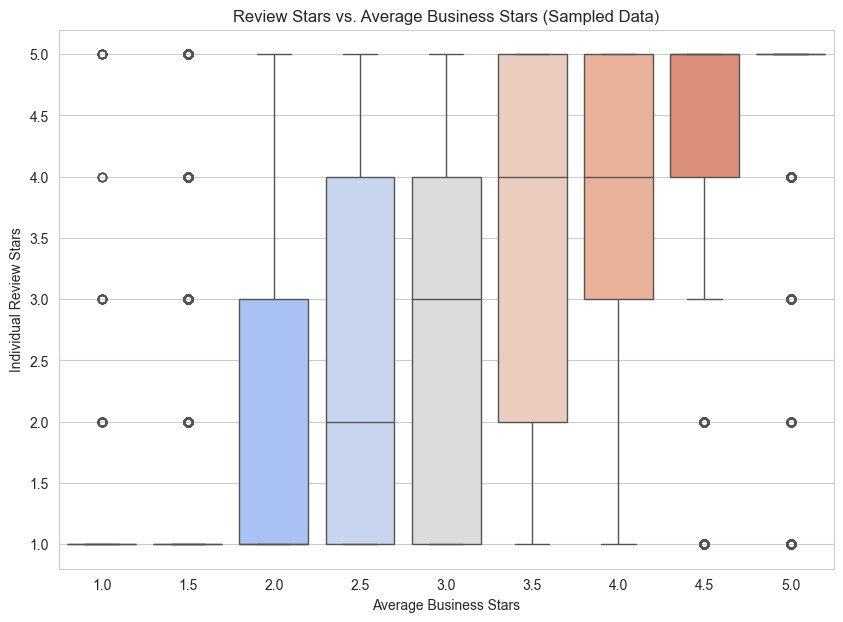

In [27]:
# Relationship between business stars and review stars (using the sample)
if not df_merged_sample.empty and 'stars_business' in df_merged_sample.columns and 'stars_review' in df_merged_sample.columns:
    plt.figure(figsize=(10, 7)) # Slightly larger
    sns.boxplot(x='stars_business', y='stars_review', data=df_merged_sample, palette='coolwarm')
    plt.title('Review Stars vs. Average Business Stars (Sampled Data)')
    plt.xlabel('Average Business Stars')
    plt.ylabel('Individual Review Stars')
    plt.show()
else:
    print("Skipping 'Business Stars vs Review Stars' plot: Merged sample data is empty or missing required columns.")

C:\Users\wiztu\AppData\Local\Temp\ipykernel_18208\3920530756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars_review', y='user_avg_stars', data=df_merged_sample, palette='viridis')


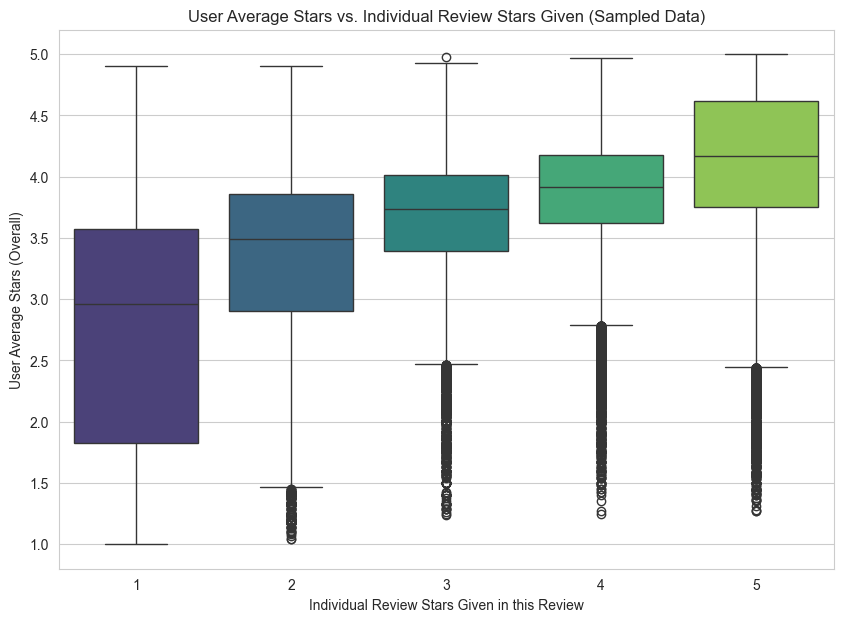

In [28]:
# Relationship between user's average stars and their review stars (using the sample)
if not df_merged_sample.empty and 'user_avg_stars' in df_merged_sample.columns and 'stars_review' in df_merged_sample.columns:
    plt.figure(figsize=(10, 7))
    # Using boxplot: for each category of review stars given (x-axis), show the distribution of the user's overall average stars (y-axis)
    sns.boxplot(x='stars_review', y='user_avg_stars', data=df_merged_sample, palette='viridis')
    plt.title('User Average Stars vs. Individual Review Stars Given (Sampled Data)')
    plt.xlabel('Individual Review Stars Given in this Review')
    plt.ylabel('User Average Stars (Overall)')
    plt.show()
else:
    print("Skipping 'User Avg Stars vs Review Stars' plot: Merged sample data is empty or missing required columns.")

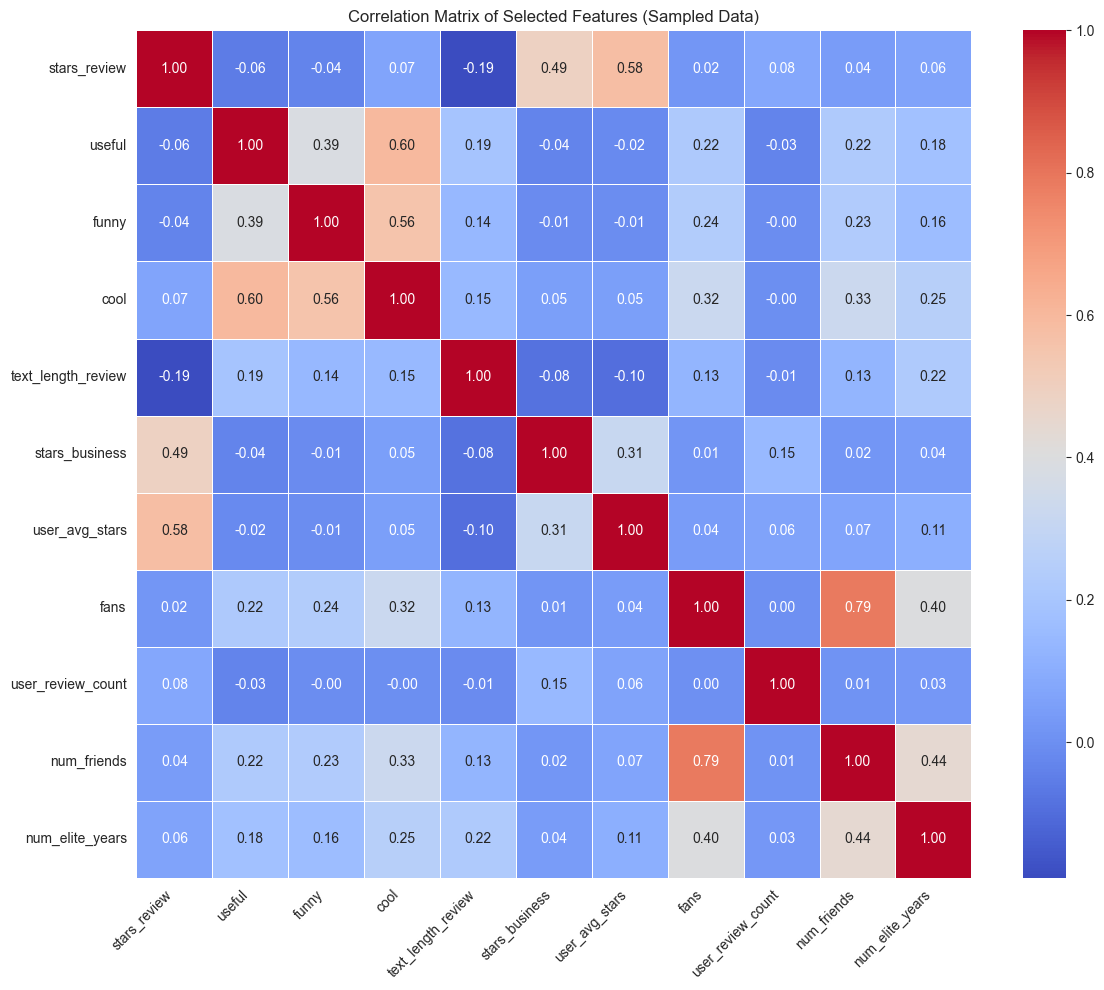

In [29]:
if not df_merged_sample.empty:
    # Define columns based on the names used *after* merging and renaming
    cols_for_corr = [
        'stars_review', 'useful', 'funny', 'cool', 'text_length_review', # Review features
        'stars_business', 'review_count_business', # Business features
        'user_avg_stars', 'fans', 'user_review_count', 'num_friends', 'num_elite_years' # User features
    ]

    # Ensure columns actually exist in the sampled dataframe before calculating correlation
    existing_cols_for_corr = [col for col in cols_for_corr if col in df_merged_sample.columns]
    missing_cols = set(cols_for_corr) - set(existing_cols_for_corr)
    if missing_cols:
        print(f"Warning: Columns missing for correlation heatmap: {missing_cols}")

    if len(existing_cols_for_corr) > 1: # Need at least 2 columns for correlation
        plt.figure(figsize=(12, 10))
        correlation_matrix = df_merged_sample[existing_cols_for_corr].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Correlation Matrix of Selected Features (Sampled Data)')
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print("Skipping correlation heatmap: Not enough numerical columns found in the merged sample data.")
else:
    print("Skipping correlation heatmap: Merged sample data is empty.")

## 5. Text Analysis (Reviews & Tips)

Perform basic text analysis like word frequency and word clouds.

In [30]:
# Import necessary libraries for text analysis
# Ensure these are installed: pip install wordcloud nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
# from collections import Counter # Already imported
import string
import re # For cleaning

# Download stopwords if not already downloaded
try:
    # Attempt to find the resource. This will raise LookupError if not found.
    nltk.data.find('corpora/stopwords')
    print("NLTK stopwords found.")
# Catch the correct error if the resource is not found
except LookupError: # <--- FIX: Change this line
    print("NLTK stopwords not found. Downloading...")
    nltk.download('stopwords')
    print("NLTK stopwords downloaded.")

# Define standard English stopwords (this part remains the same)
stop_words = set(stopwords.words('english'))
# Add custom stopwords relevant to reviews (optional, based on initial word clouds)
# custom_stopwords = {'place', 'food', 'service', 'good', 'great', 'like', 'one', 'get', 'go', 'also', 'restaurant', 'order', 'ordered', 'came', 'time', 'back', 'really', 'would', 'us', 'got', 'nice', 'even', 'bar', 'drink', 'drinks'}
# stop_words.update(custom_stopwords)

# Define standard English stopwords
stop_words = set(stopwords.words('english'))
# Add custom stopwords relevant to reviews (optional, based on initial word clouds)
# custom_stopwords = {'place', 'food', 'service', 'good', 'great', 'like', 'one', 'get', 'go', 'also', 'restaurant', 'order', 'ordered', 'came', 'time', 'back', 'really', 'would', 'us', 'got', 'nice', 'even', 'bar', 'drink', 'drinks'}
# stop_words.update(custom_stopwords)

NLTK stopwords found.


### 5.1 Review Text Analysis

Analyze the text content of the reviews (using the subset `df_review`).

In [31]:
# Function for basic text cleaning (improved)
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower() # Lowercase
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = text.strip() # Remove leading/trailing whitespace
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 1] # Keep words longer than 1 char
    return ' '.join(words)

# Apply cleaning (optional, can be memory intensive on large datasets)
# For word cloud, we can process text directly
# df_review['cleaned_text'] = df_review['text'].apply(clean_text)

Generating Word Cloud for all reviews (from sampled data)...


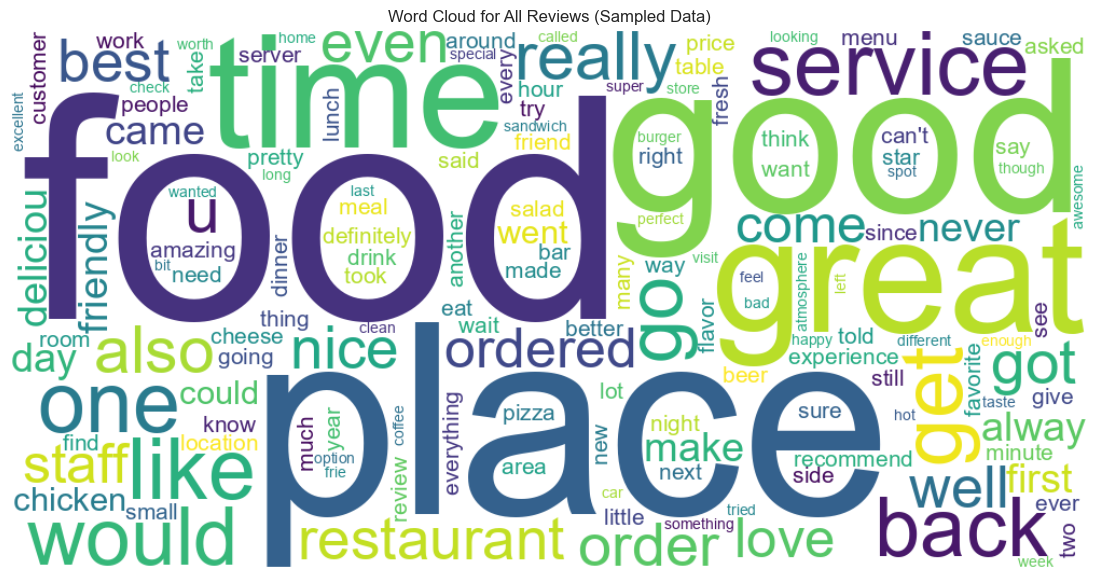

In [32]:
print("Generating Word Cloud for all reviews (from sampled data)...")

if not df_merged_sample.empty and 'text' in df_merged_sample.columns:
    # --- Specify Font Path ---
    # Adjust this path based on your system and chosen font
    font_path = '../ARIAL.TTF'
    # Alternative example for Linux:
    # font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
    # Alternative example for macOS:
    # font_path = '/Library/Fonts/Arial.ttf'

    # --- Check if font exists ---
    if not os.path.exists(font_path):
         print(f"WARNING: Font file not found at '{font_path}'. WordCloud might fail or use a default.")
         # If the specified font doesn't exist, fall back to None, 
         # letting wordcloud try its default search (which might fail again)
         font_path = None 

    # Concatenate all review texts from the sample, ensuring they are strings
    all_review_text = ' '.join(df_merged_sample['text'].astype(str).dropna().tolist())

    if all_review_text.strip(): # Check if there is text after cleaning NAs etc.
        try:
            wordcloud_all = WordCloud(
                width=1000, # Larger width
                height=500, # Larger height
                background_color='white',
                stopwords=stop_words, # Pass the extended stopwords list
                max_words=150,
                colormap='viridis',
                collocations=False, # Disable bigrams/collocations for faster processing
                font_path=font_path  # <--- ADD THIS ARGUMENT
            ).generate(all_review_text)

            plt.figure(figsize=(14, 7)) # Larger figure
            plt.imshow(wordcloud_all, interpolation='bilinear')
            plt.axis('off')
            plt.title('Word Cloud for All Reviews (Sampled Data)')
            plt.show()
        except Exception as e:
             print(f"Error generating word cloud: {e}")
             # This might happen if font_path was None and default search failed
    else:
        print("No text content found in the review sample to generate a word cloud.")

    del all_review_text # Clean up memory
    if 'wordcloud_all' in locals(): del wordcloud_all
    gc.collect()

else:
    print("Skipping review word cloud: Merged sample data is empty or missing 'text' column.")

Generating Word Clouds for positive and negative reviews (from sampled data)...


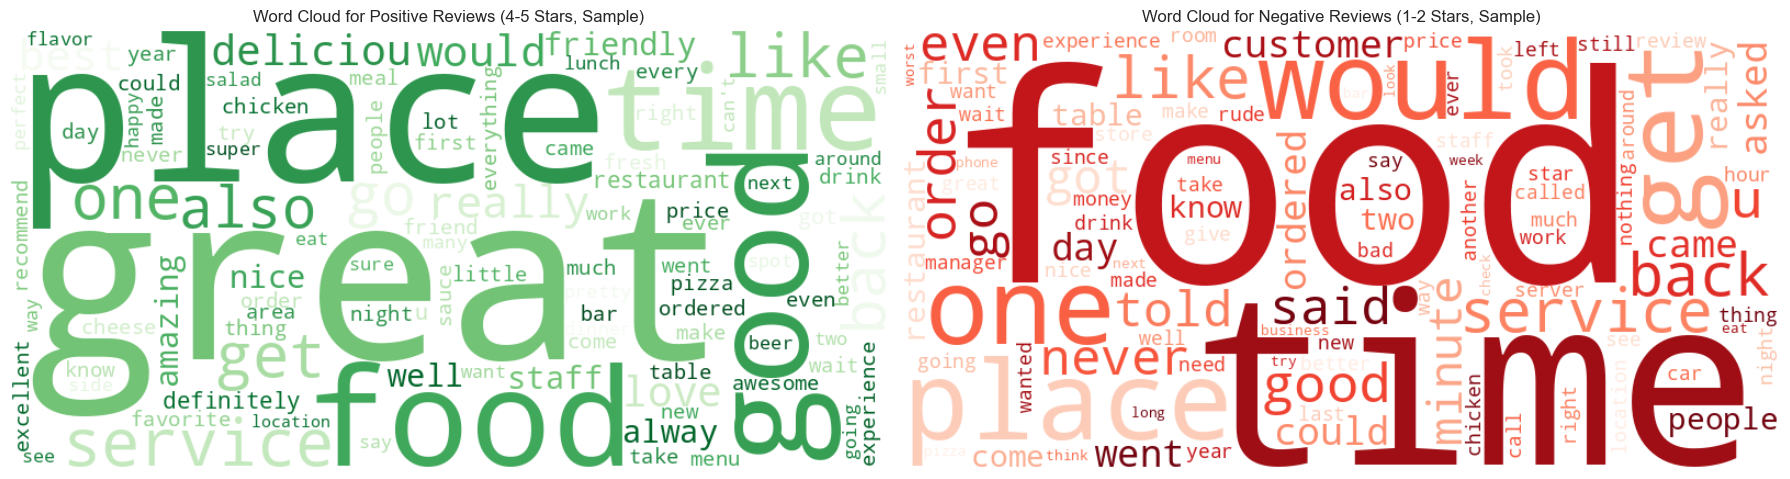

In [33]:
# Generate Word Clouds for positive (4-5 stars) and negative (1-2 stars) reviews (using sample)
if not df_merged_sample.empty and 'text' in df_merged_sample.columns and 'stars_review' in df_merged_sample.columns:
    print("Generating Word Clouds for positive and negative reviews (from sampled data)...")

    # Filter text based on stars, ensuring text is string and not null
    positive_reviews_text = ' '.join(df_merged_sample[df_merged_sample['stars_review'] >= 4]['text'].astype(str).dropna().tolist())
    negative_reviews_text = ' '.join(df_merged_sample[df_merged_sample['stars_review'] <= 2]['text'].astype(str).dropna().tolist())

    # Plotting setup
    fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # Wider figure for side-by-side

    # Positive Reviews Word Cloud
    if positive_reviews_text.strip():
        wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100, colormap='Greens', collocations=False).generate(positive_reviews_text)
        axes[0].imshow(wordcloud_positive, interpolation='bilinear')
        axes[0].set_title('Word Cloud for Positive Reviews (4-5 Stars, Sample)')
        axes[0].axis('off')
    else:
        axes[0].text(0.5, 0.5, 'No positive review text found in sample', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
        axes[0].set_title('Positive Reviews (4-5 Stars, Sample)')
        axes[0].axis('off')


    # Negative Reviews Word Cloud
    if negative_reviews_text.strip():
        wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, max_words=100, colormap='Reds', collocations=False).generate(negative_reviews_text)
        axes[1].imshow(wordcloud_negative, interpolation='bilinear')
        axes[1].set_title('Word Cloud for Negative Reviews (1-2 Stars, Sample)')
        axes[1].axis('off')
    else:
        axes[1].text(0.5, 0.5, 'No negative review text found in sample', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
        axes[1].set_title('Negative Reviews (1-2 Stars, Sample)')
        axes[1].axis('off')


    plt.tight_layout()
    plt.show()

    # Clean up memory
    del positive_reviews_text, negative_reviews_text
    if 'wordcloud_positive' in locals(): del wordcloud_positive
    if 'wordcloud_negative' in locals(): del wordcloud_negative
    gc.collect()

else:
    print("Skipping positive/negative review word clouds: Merged sample data is empty or missing required columns.")


### 5.2 Tip Text Analysis

Generating Word Cloud for all tips...


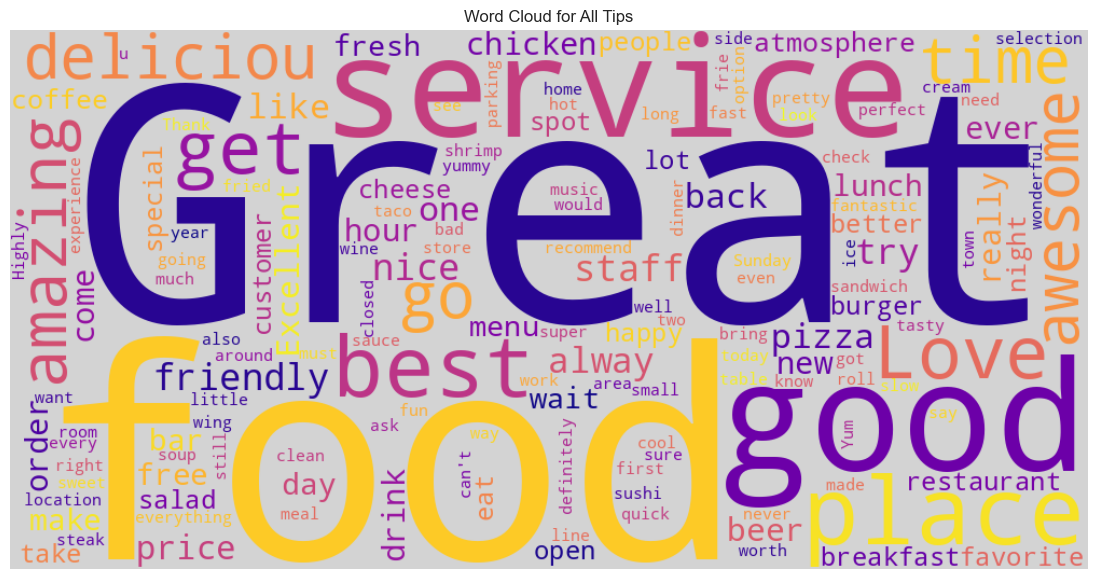

In [34]:
# Generate Word Cloud for all tips
if df_tip is not None and not df_tip.empty and 'text' in df_tip.columns:
    print("Generating Word Cloud for all tips...")

    # Concatenate all tip texts, ensuring they are strings and not null
    all_tip_text = ' '.join(df_tip['text'].astype(str).dropna().tolist())

    if all_tip_text.strip():
        # Use slightly different parameters for tips if desired
        wordcloud_tip = WordCloud(
            width=1000,
            height=500,
            background_color='lightgrey', # Different background
            stopwords=stop_words,
            max_words=150,
            colormap='plasma',
            collocations=False
        ).generate(all_tip_text)

        plt.figure(figsize=(14, 7))
        plt.imshow(wordcloud_tip, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for All Tips')
        plt.show()
    else:
        print("No text content found in tips to generate a word cloud.")

    del all_tip_text # Clean up memory
    if 'wordcloud_tip' in locals(): del wordcloud_tip
    gc.collect()

else:
    print("Skipping tip word cloud: Tip data is not loaded, empty, or missing 'text' column.")

## 6. Summary & Next Steps

Summarize key findings and outline potential next steps for data cleaning, feature engineering, and modeling.

### Key Findings:
*   **Data Overview:** The dataset contains rich information across businesses, user interactions (reviews, tips, check-ins), and user profiles. The review and user files are particularly large.
*   **Businesses:** Skewed distribution for `review_count` (many businesses with few reviews, few with many). `stars` distribution shows common ratings around 3.5-4.5. A significant portion (~30% in the full dataset) are restaurants. Missing values exist, notably in `attributes` and `hours`.
*   **Reviews:** Star ratings are heavily skewed towards positive (4-5 stars). `useful`, `funny`, `cool` votes are also skewed, with most reviews receiving few votes. Review text length varies significantly. Review volume increased over the years (based on the subset).
*   **Users:** User activity (`review_count`, `fans`, votes, compliments) is highly skewed. `average_stars` tends to be high. User join dates span a long period.
*   **Checkins:** Number of check-ins per business is highly skewed.
*   **Tips:** Tips are much shorter than reviews. `compliment_count` is low for most tips.
*   **Relationships:** Business stars and review stars show a positive correlation, as expected. User average stars correlate with the stars they give in individual reviews. Review votes (`useful`, `funny`, `cool`) show some positive correlation with each other and with review text length.
*   **Text Analysis:** Word clouds reveal common terms associated with reviews and tips, with differences between positive and negative reviews (e.g., 'amazing', 'delicious' vs. 'disappointed', 'worst'). Common words like 'food', 'place', 'service', 'good', 'great' dominate if not excluded as stopwords.

### Potential Next Steps (Noise Cleaning & Filtering for Graph Analysis):
1.  **Focus on Restaurants:** Filter `df_business` to include only businesses categorized as 'Restaurants' or related food categories, as per the project goal.
2.  **Handle Missing Values:** Decide on strategies for missing `attributes`, `hours`, etc. (imputation, removal, or feature engineering).
3.  **Filter by Location:** Potentially focus on a specific city or region (e.g., a major city like Las Vegas or Phoenix, which are prominent in the dataset) to create a more manageable and potentially denser graph.
4.  **Filter by Activity/Recency:** Consider filtering out inactive users (low `review_count`) or very old reviews/businesses if focusing on recent trends.
5.  **Create Subset:** Based on the filters above, create a final subset of businesses, users, and reviews/tips.
6.  **Feature Engineering:** 
    *   Parse `attributes` and `hours` for businesses.
    *   Extract features from `date` columns (day of week, month, year).
    *   Perform more advanced text analysis (sentiment scores, topic modeling) on reviews/tips.
    *   Calculate user tenure (`current_date - yelping_since`).
7.  **Prepare for Neo4j:** Structure the chosen subset into nodes (Users, Businesses, Reviews/Tips) and relationships (WROTE, REVIEWED, FRIENDS_WITH, CHECKED_IN, TIPPED_ON) for loading into Neo4j.